Non-hierarchical clustering

Goal: to identify a group of customers who will leave the company in the data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
%matplotlib inline

In [2]:
# Loading data and deleting unnecessary columns
raw_data = pd.read_csv('MarketSegmentation.csv')

data = raw_data.drop(['Unnamed: 0'],axis=1)
x = data.values

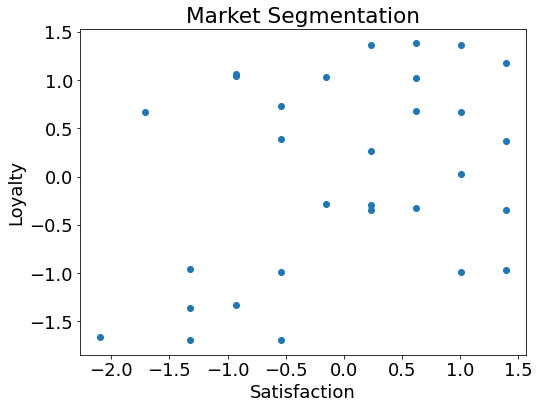

In [3]:
# Visualization of sets of points
plt.figure(figsize=(8, 6))
font = {'family': 'sans', 'size': 18}
plt.rc('font', **font)
plt.scatter(x[:,0], x[:,1])
plt.title('Market Segmentation')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

As can be seen from the data, there is an assumption of two data clusters

Therefore, for the first K-means test, you can take 2 clusters


Visualization of clustering

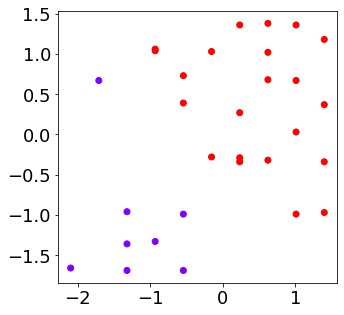

In [4]:
yp = KMeans(n_clusters=2).fit_predict(x)

plt.figure(figsize=(5, 5))
font = {'family': 'sans', 'size': 18}
plt.rc('font', **font)
plt.scatter(x[:,0], x[:,1], c=yp, cmap=plt.get_cmap('rainbow'))

Testing a different number of partitions 

Applying the K-means algorithm for the number of clusters from 2 to 9

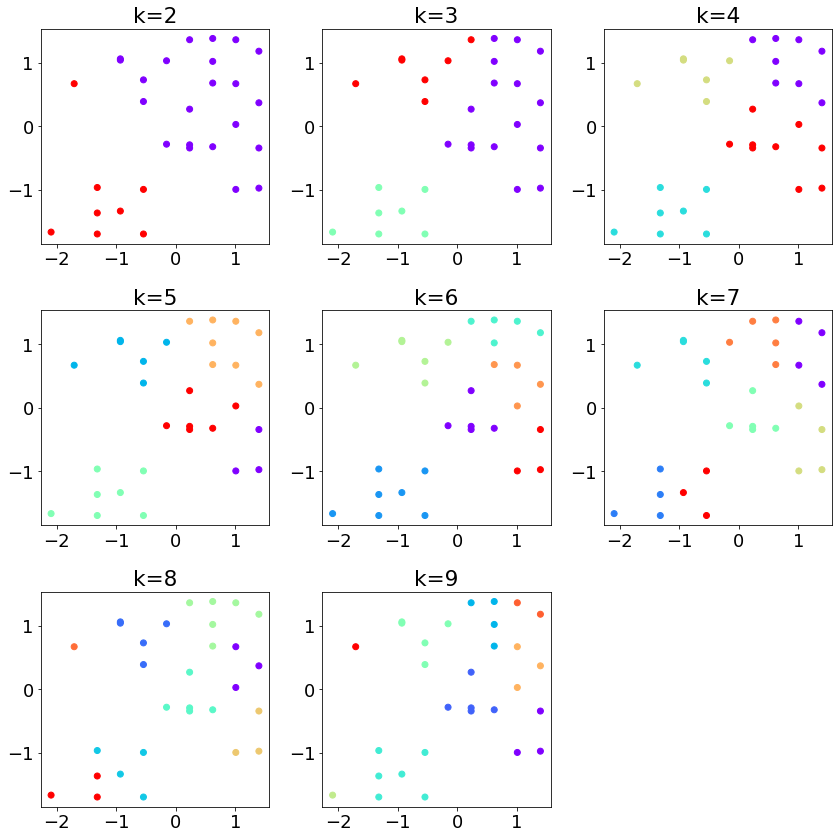

In [5]:
plt.figure(figsize=(12, 12))

for i in range(8):
    yp = KMeans(n_clusters=(i + 2)).fit_predict(x)
    plt.subplot(330 + (i + 1))
    plt.title('k=' + str(i + 2))
    plt.scatter(x[:,0], x[:,1], c=yp, cmap=plt.get_cmap('rainbow'))
plt.tight_layout()

For Knee/Elbow analysis, we write a function to calculate the clustering criterion for each number of partitions

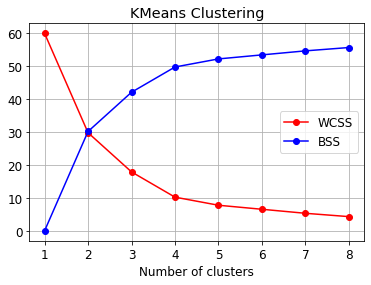

In [6]:
def KneeElbowAnalysis(x, max_k = 9):
    k_values = range(1, max_k)
    clusterings = [KMeans(n_clusters=k).fit(x) for k in k_values]
    centroids = [clustering.cluster_centers_ for clustering in clusterings]
    D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
    dist = [np.min(D, axis=1) for D in D_k]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(x)**2)/x.shape[0]
    bss = tss - wcss
    font = {'family': 'sans', 'size': 12}
    plt.rc('font', **font)
    plt.xticks(k_values)
    plt.plot(k_values, wcss, 'bo-', color='red', label='WCSS')
    plt.plot(k_values, bss, 'bo-', color='blue', label='BSS')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.legend()
    plt.title('KMeans Clustering')

KneeElbowAnalysis(x)

The graph shows an obvious decrease in the differences in criteria after the division into 4 clusters, therefore, 4 clusters should be taken as a basis for separation.

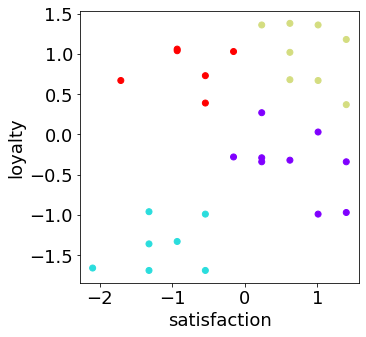

In [7]:
yp = KMeans(n_clusters=4).fit_predict(x)
plt.figure(figsize=(5, 5))
font = {'family': 'sans', 'size': 18}
plt.rc('font', **font)
plt.xlabel('satisfaction')
plt.ylabel('loyalty')
plt.scatter(x[:,0], x[:,1], c=yp, cmap=plt.get_cmap('rainbow'))

Summarizing the clustering described above, we can conclude that the customers who are most likely to leave the company (with the least satisfaction and loyalty) are indicated on the graph in turquoise